In [3]:
import urllib

urllib.request.urlretrieve("https://data.economie.gouv.fr/explore/dataset/prix-carburants-fichier-instantane-test-ods-copie/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B", "data/fichier_inst.csv")

('data/fichier_inst.csv', <http.client.HTTPMessage at 0x27d29c0a7d0>)

In [4]:
import pandas as pd 
dat_inst = pd.read_csv('data/fichier_inst.csv', sep= ';', on_bad_lines= 'skip')

In [94]:
def data_carb(df, carb):
    data_1 = df[['adresse', 'ville', 'geom', 'prix_valeur', 'prix_nom', 'Code Officiel Département',
       'Nom Officiel Département']]
    d = data_1[data_1.prix_nom == carb]
    d.drop_duplicates(keep = 'first', inplace=True) 
    #df.drop_duplicates(subset ="'column'", keep = 'first', inplace=True) si on veut supprimer selon une colonne
    return d

In [95]:
df_visu = data_carb(dat_inst,"SP95")

C:\Users\arman\AppData\Local\Temp\ipykernel_33280\292867293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop_duplicates(keep = 'first', inplace=True)


In [51]:
def nb_station(df,Adresse, rayon) : #calcul de nb de station dans un rayon spécifié
    n=0
    position=Adresse_to_gps(Adresse)
    A = list(map(float,position.split(',')))
    for station in range(len(df)) : 
        B = list(map(float,df.iloc[station,2].split(',')))
        D=distance1(A,B)
        if D<rayon : 
            n=n+1
    return n 

print(nb_station(df_visu, "1 rue d'Arsonval, Orsay, France", 20000))

0


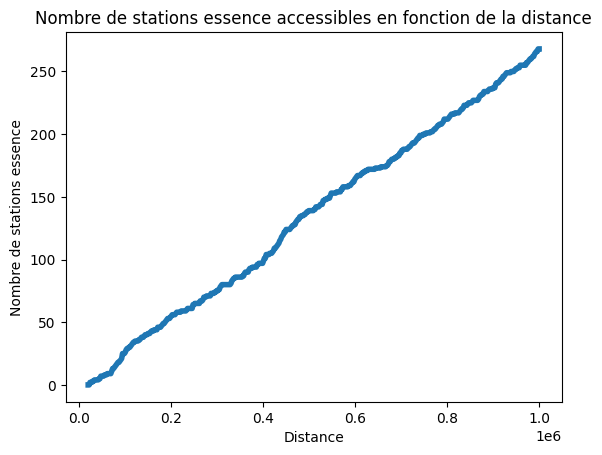

In [81]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(20000, 1000000, 500)
y=[]

for l in range(len(x)) : #prend 7min !
    y.append(nb_station(df_visu, "1 rue d'Arsonval, Orsay, France", x[l]))

plt.plot(x, y, linewidth=4)
plt.xlabel("Distance")
plt.ylabel("Nombre de stations essence")
plt.title("Nombre de stations essence accessibles en fonction de la distance")


plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (50567298.py, line 1)

In [105]:
#calcul du prix du carburant par département

df_moy=df_visu
df_tst=df_moy.sample(200)

Prix_moy_dep=df_tst.groupby('Code Officiel Département')['prix_valeur'].mean()

Df_tstf= df_tst.merge(Prix_moy_dep, how='outer', on=['Code Officiel Département'] )
